Linear Regression Mean Squared Error: 0.5558915986952442
Epoch 1/50
413/413 [==============================] - 4s 6ms/step - loss: 0.9720 - val_loss: 0.5185
Epoch 2/50
413/413 [==============================] - 2s 5ms/step - loss: 0.4662 - val_loss: 0.4230
Epoch 3/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3707 - val_loss: 0.4034
Epoch 4/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3562 - val_loss: 0.3767
Epoch 5/50
413/413 [==============================] - 3s 7ms/step - loss: 0.3401 - val_loss: 0.3708
Epoch 6/50
413/413 [==============================] - 3s 7ms/step - loss: 0.3349 - val_loss: 0.3559
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 0.3252 - val_loss: 0.3507
Epoch 8/50
413/413 [==============================] - 2s 6ms/step - loss: 0.3236 - val_loss: 0.3465
Epoch 9/50
413/413 [==============================] - 3s 8ms/step - loss: 0.3156 - val_loss: 0.3476
Epoch 10/50
413/413 [======================

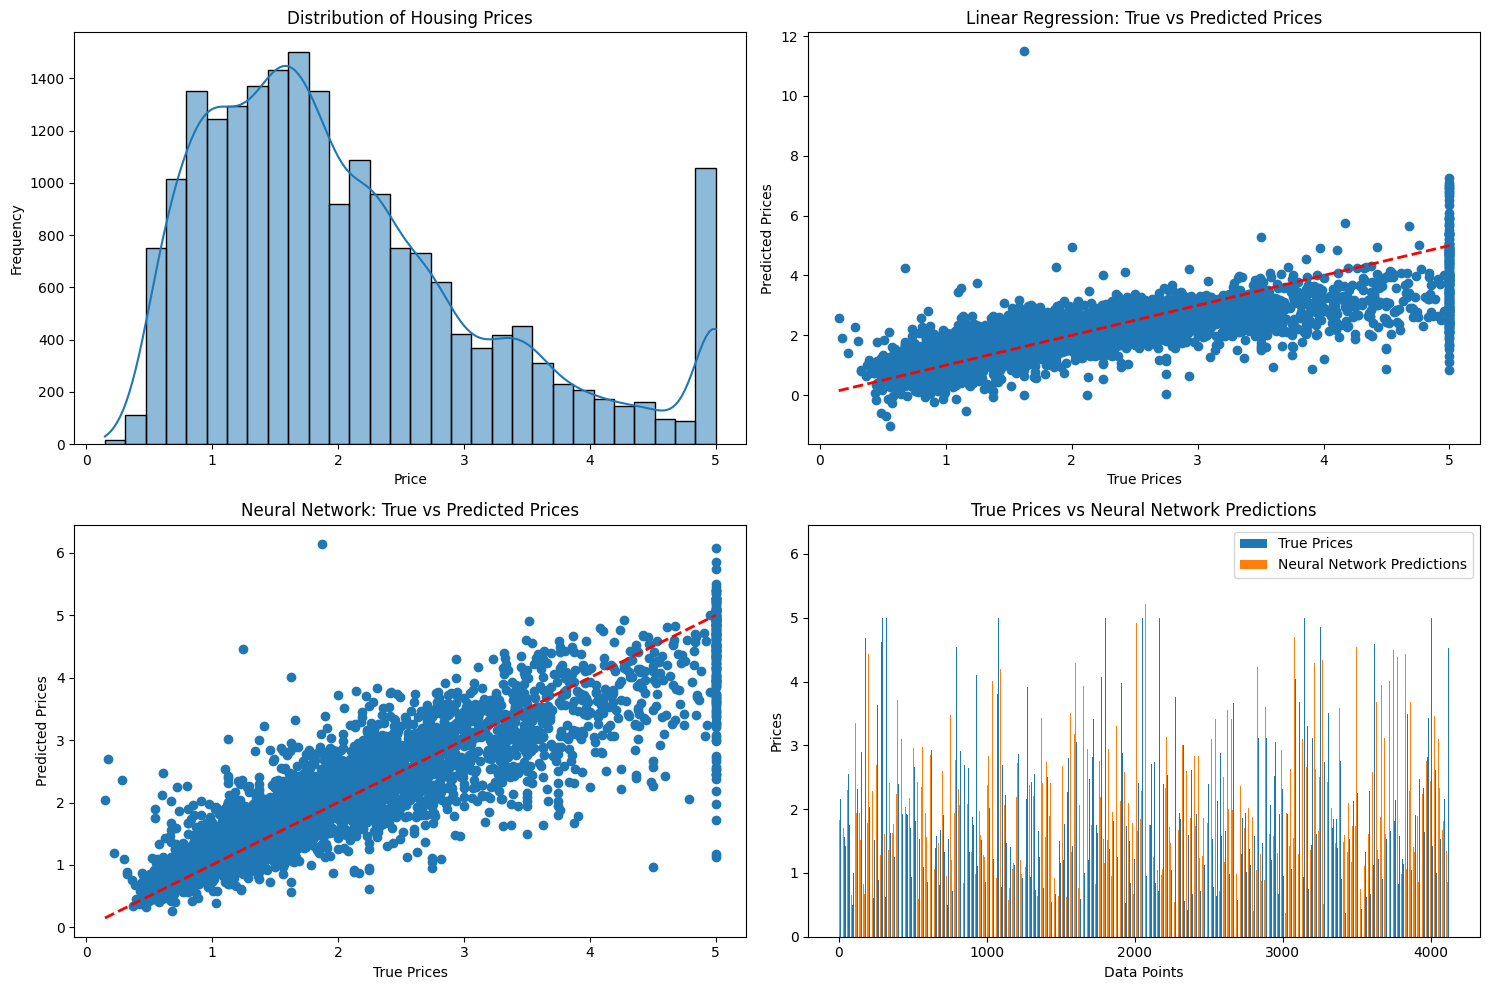

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization: Scale features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the Linear Regression model
y_pred_lr = regressor.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

# Neural Network with TensorFlow/Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the Neural Network model
nn_pred = model.predict(X_test)
mse_nn = mean_squared_error(y_test, nn_pred)
print(f"Neural Network Mean Squared Error: {mse_nn}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Dataset Visualization
sns.histplot(data.target, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Housing Prices')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Linear Regression
axes[0, 1].scatter(y_test, y_pred_lr)
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[0, 1].set_title('Linear Regression: True vs Predicted Prices')
axes[0, 1].set_xlabel('True Prices')
axes[0, 1].set_ylabel('Predicted Prices')

# Neural Network
axes[1, 0].scatter(y_test, nn_pred)
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[1, 0].set_title('Neural Network: True vs Predicted Prices')
axes[1, 0].set_xlabel('True Prices')
axes[1, 0].set_ylabel('Predicted Prices')

# Bar Graph for Comparing True and Predicted Prices
bar_width = 0.35
bar_positions = np.arange(len(y_test))

axes[1, 1].bar(bar_positions, y_test, bar_width, label='True Prices')
axes[1, 1].bar(bar_positions + bar_width, nn_pred.flatten(), bar_width, label='Neural Network Predictions')
axes[1, 1].set_title('True Prices vs Neural Network Predictions')
axes[1, 1].set_xlabel('Data Points')
axes[1, 1].set_ylabel('Prices')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
